<a href="https://colab.research.google.com/github/IsabelGayayan/Data-Mining/blob/main/Kidney_Stone_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data and libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset-kidney-stone.csv')

1. Preprocess Data: 
Examine the distribution of each feature to see if it is
skewed or has any outliers.If there are outliers, decide how to handle them, such as by removing them or transforming the data

In [ ]:
#descriptive stats
df.describe()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,44.500000,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,26.124701,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,22.250000,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,44.500000,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,66.750000,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,89.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


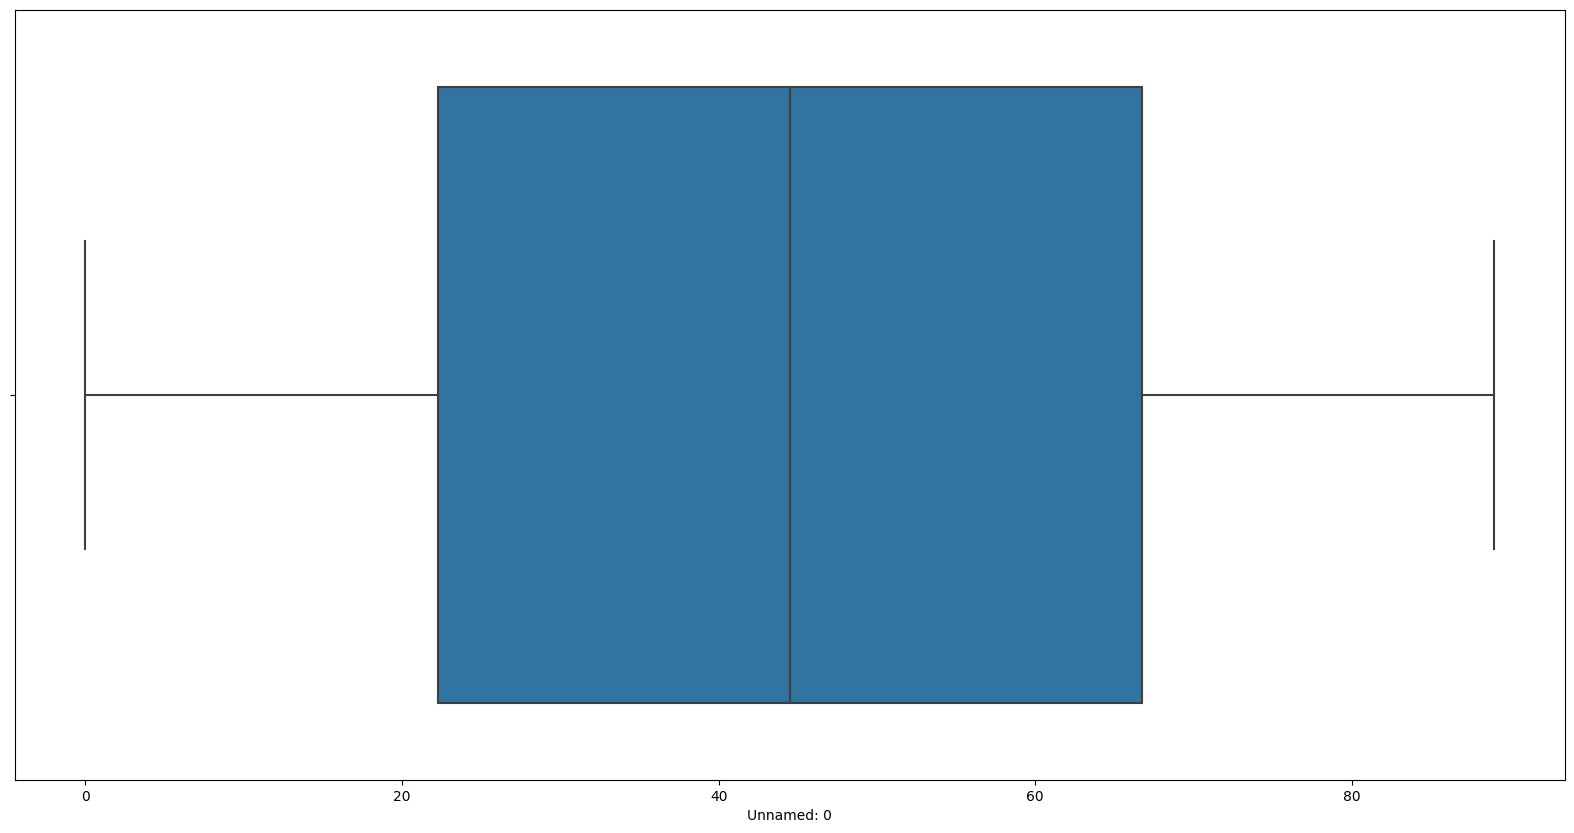

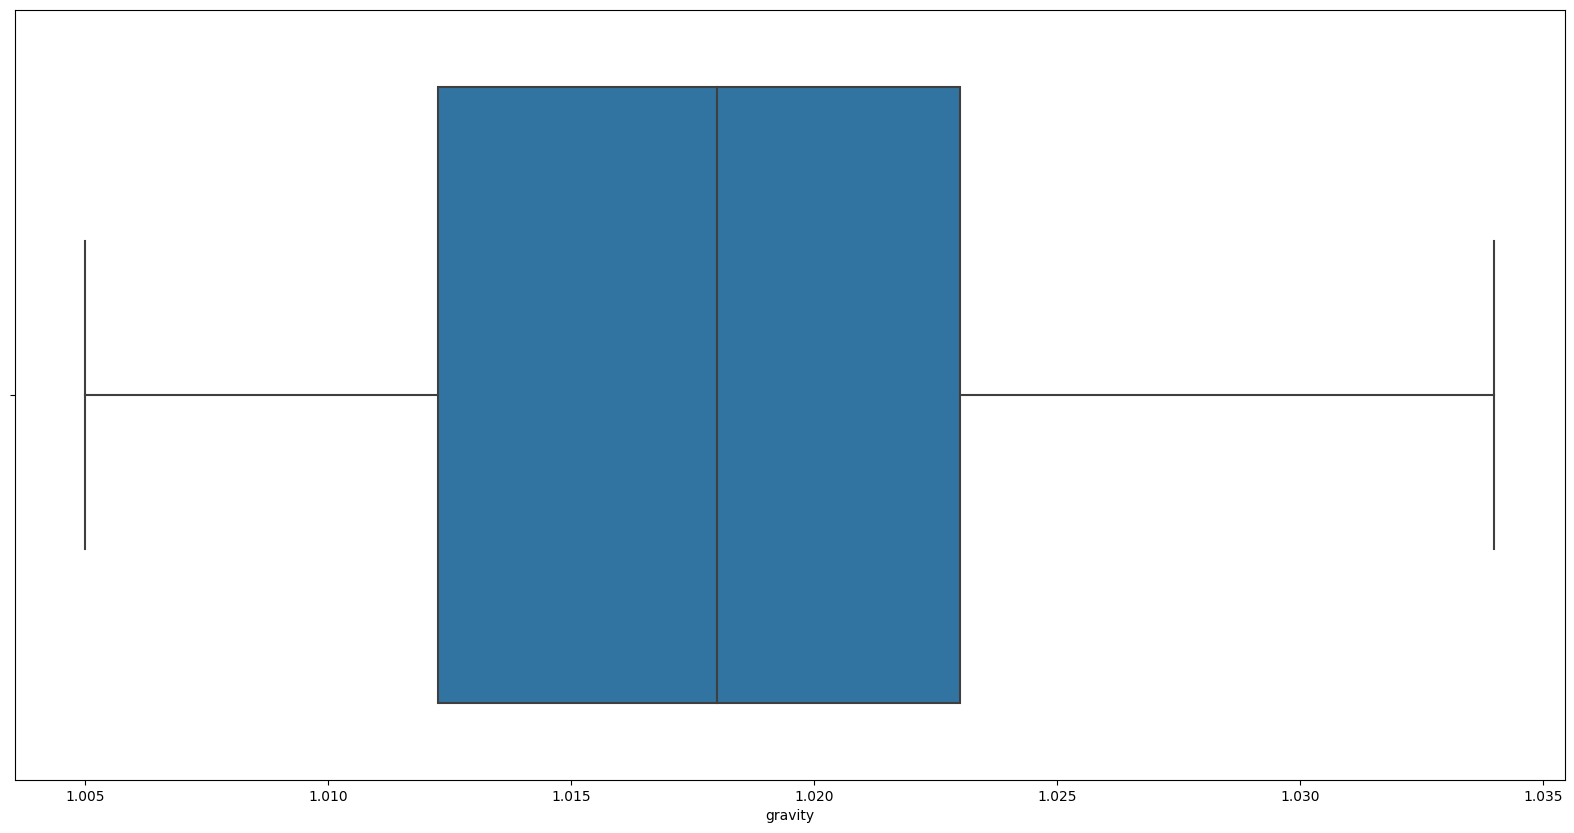

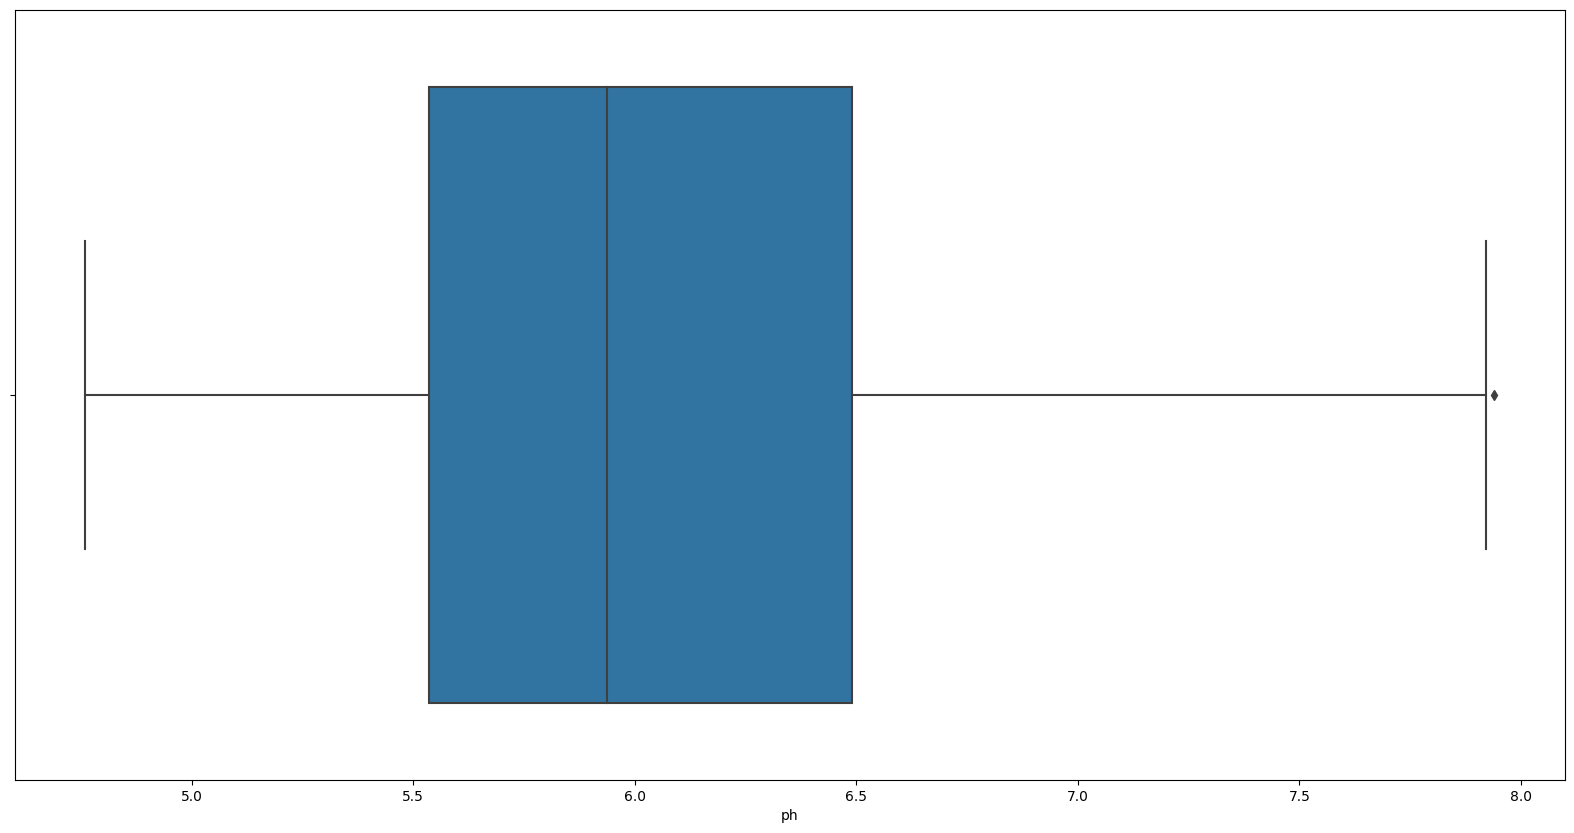

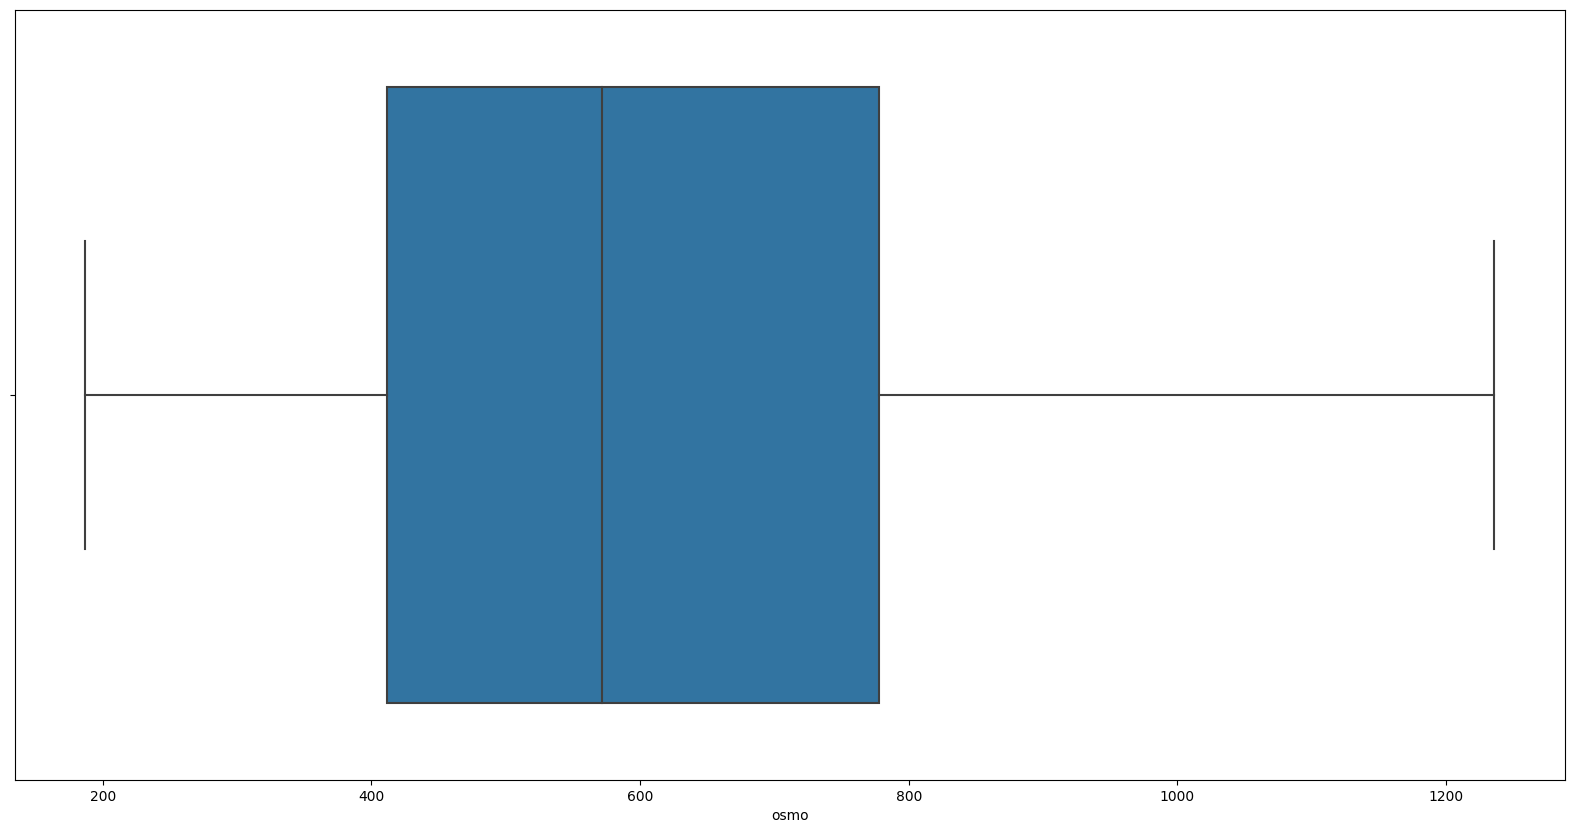

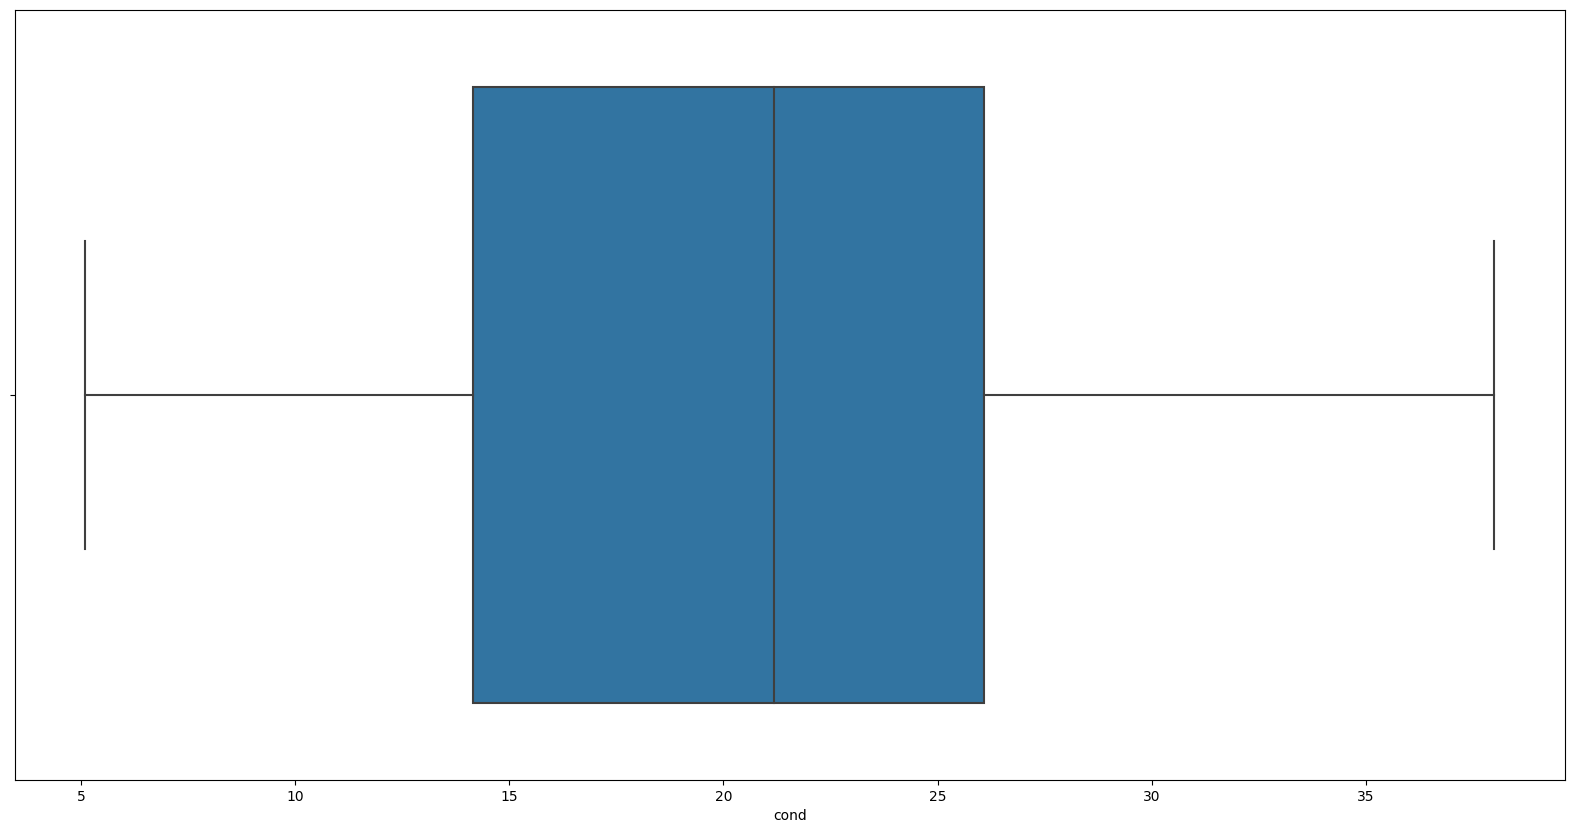

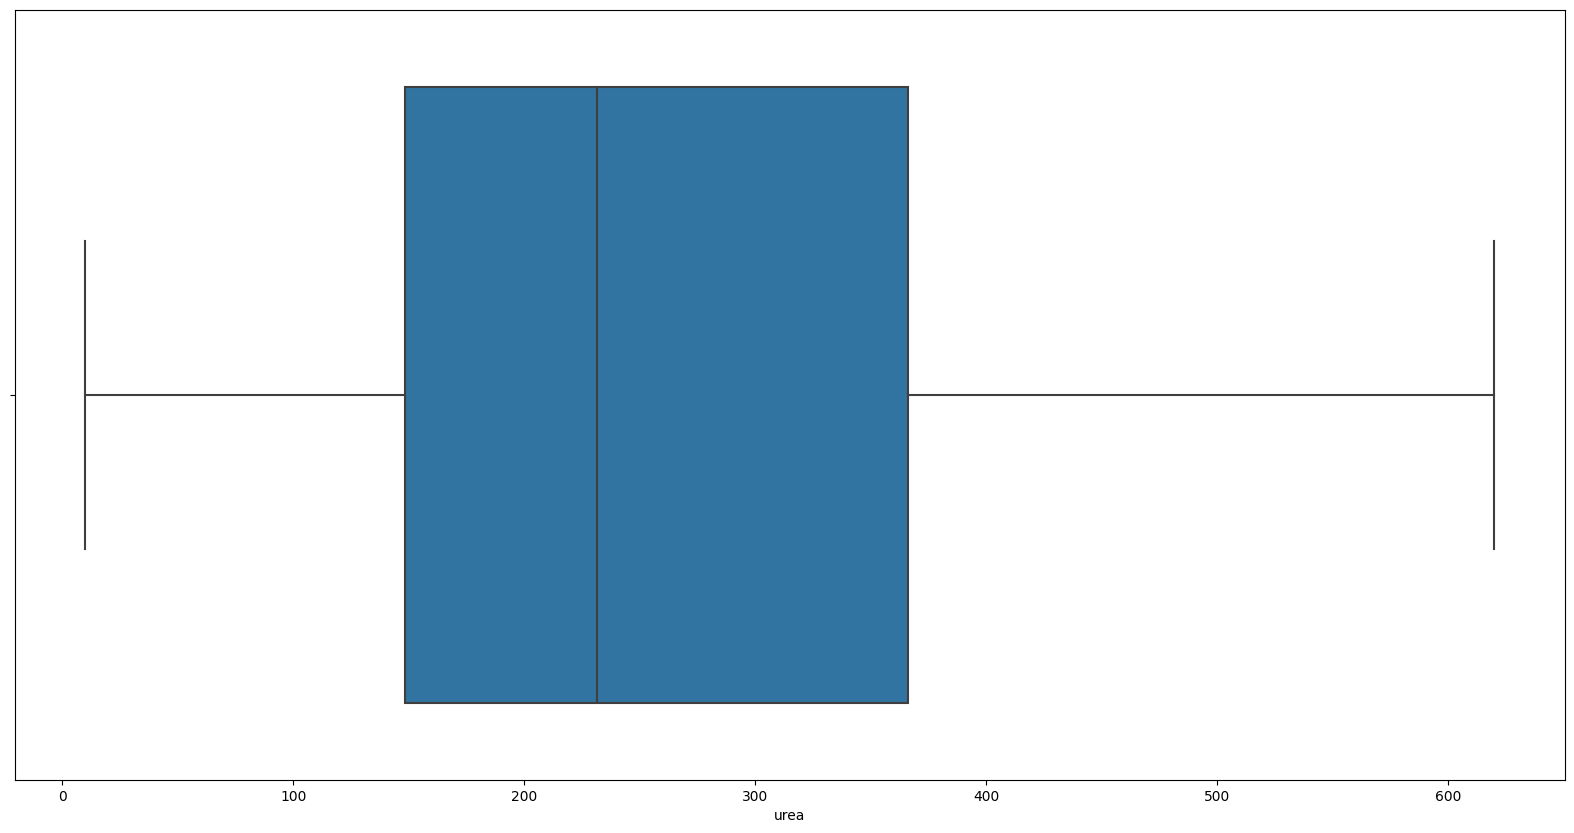

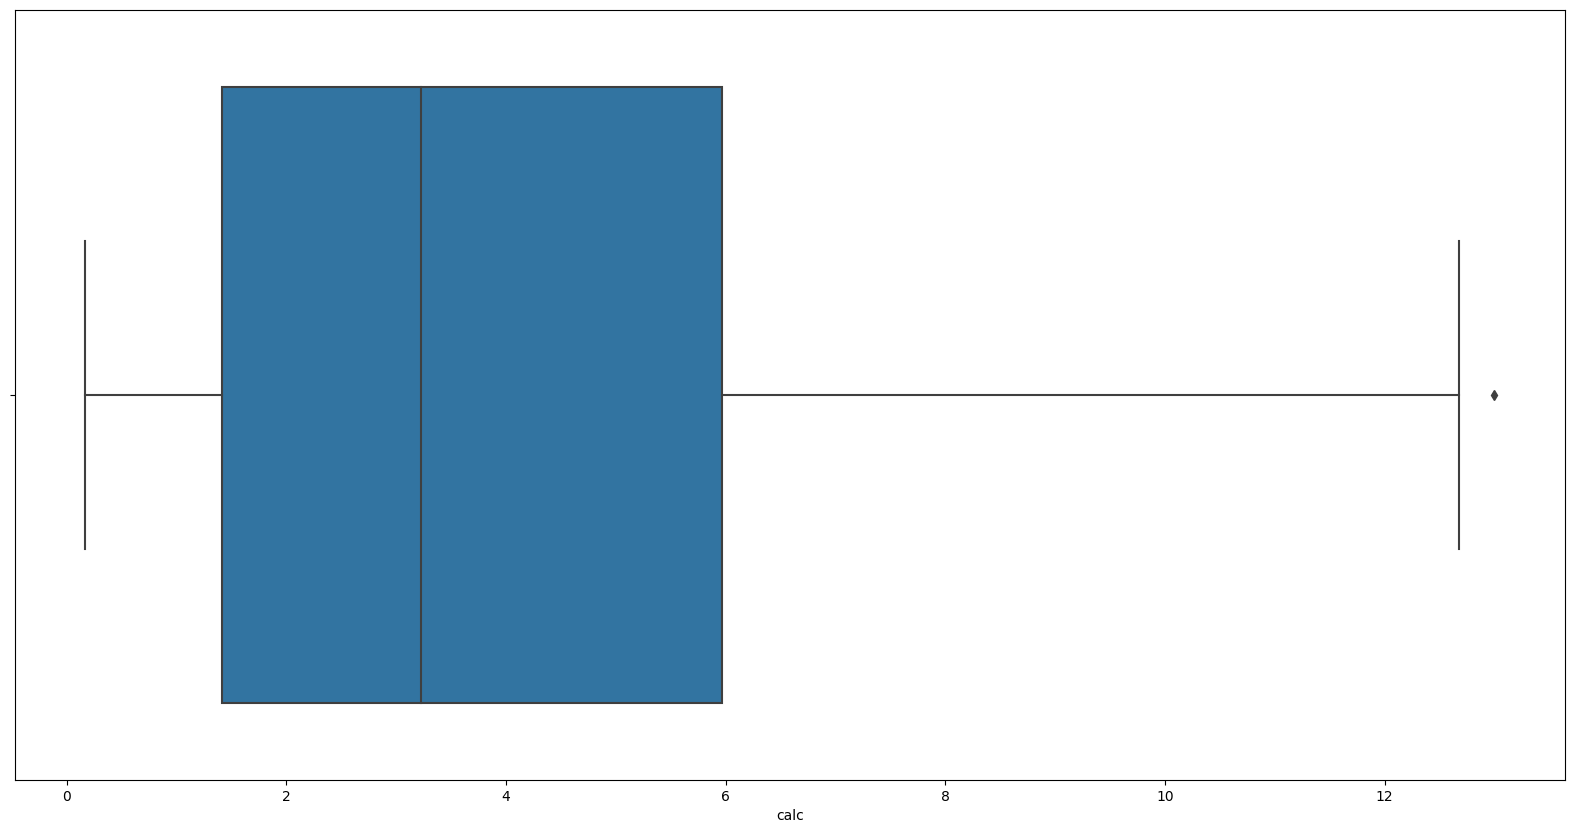

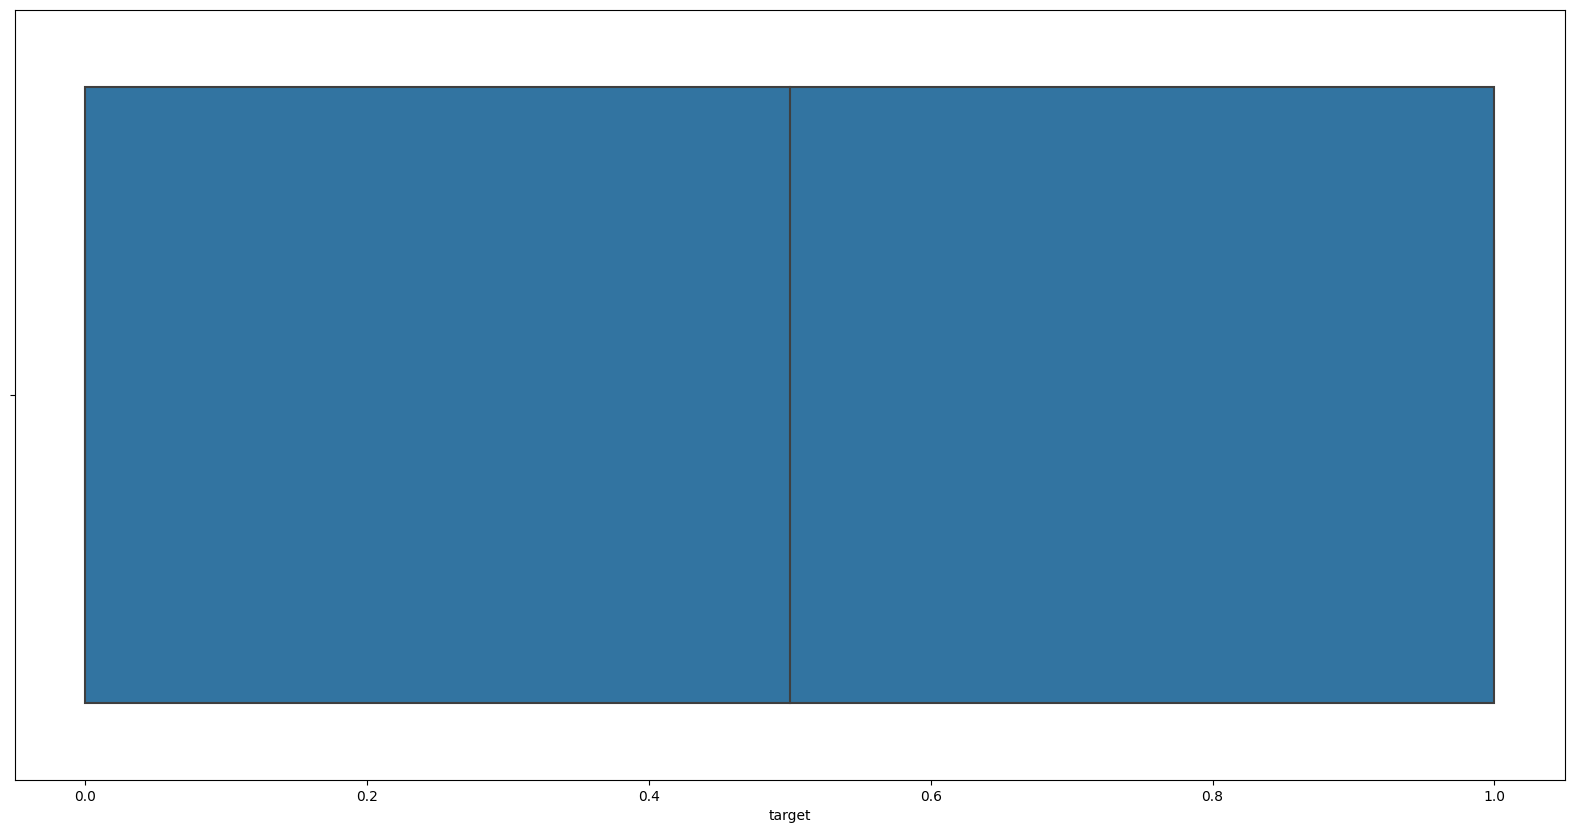

In [ ]:
#check for outliers
plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = df["Unnamed: 0"]);

plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = df["gravity"]);

plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = df["ph"]);

plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = df["osmo"]);

plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = df["cond"]);

plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = df["urea"]);

plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = df["calc"]);

plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = df["target"]);

In [ ]:
#remove outliers from ph and calc
ph_outliers = df.loc[df["ph"] > 7.9]
calc_outliers = df.loc[df["calc"] > 13]

filter = (df['ph'] > 7.9) & (df['calc'] > 13)

In [ ]:
#check data types if theyre all in the same format
from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()
for column in df.select_dtypes(include=['object']):
  df[column]=label_encod.fit_transform(df[column])

df.dtypes

Unnamed: 0      int64
gravity       float64
ph            float64
osmo            int64
cond          float64
urea            int64
calc          float64
target          int64
dtype: object

In [ ]:
#standardize your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(df)
print(scaled_data)

[[-1.71291154e+00  4.52075542e-01 -1.59168447e+00  5.17294226e-01
  -8.69923429e-01  1.37268249e+00 -5.22688452e-01 -1.00000000e+00]
 [-1.67441914e+00 -1.41166619e-01 -4.19095731e-01 -1.06832503e-01
  -8.16740797e-02  2.80775964e-01  1.57431928e-01 -1.00000000e+00]
 [-1.63592675e+00 -1.47596148e+00  1.64353024e+00 -1.18640306e+00
  -7.51686026e-01 -1.16767147e+00 -5.52693762e-01 -1.00000000e+00]
 [-1.59743435e+00 -1.03102986e+00 -7.44029959e-01 -8.19517754e-01
  -1.05384828e+00 -2.54035396e-01 -6.22706154e-01 -1.00000000e+00]
 [-1.55894196e+00 -1.92089310e+00  6.82855128e-01 -1.75149078e+00
  -1.72386022e+00 -1.24195083e+00 -9.52764574e-01 -1.00000000e+00]
 [-1.52044957e+00  3.03765002e-01 -1.08309176e+00  2.76921094e-01
   6.14612845e-01 -4.60532005e-02 -2.25969267e-01 -1.00000000e+00]
 [-1.48195717e+00 -8.82719319e-01 -5.88626632e-01 -5.96012912e-01
  -4.23248798e-01 -4.69445528e-01 -8.72750411e-01 -1.00000000e+00]
 [-1.44346478e+00  1.63855986e+00 -5.17988757e-01  2.12821592e+00
   

2. Split the dataset into training and testing sets using a reasonable ratio (e.g., 80:20). This will allow you to train your model on a portion of the data and evaluate its performance on unseen data.

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
X_train.shape

(72, 7)

3. Use extreme gradient boosting (XGBoost) to predict the risk of kidney stones based on the input features.


In [ ]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_predictions = xgb_regressor.predict(X_test)
y_predictions

array([9.7139295e-05, 9.7139295e-05, 9.9991781e-01, 9.7139295e-05,
       9.9991781e-01, 9.7139295e-05, 9.7139295e-05, 9.9991781e-01,
       9.9991781e-01, 9.7139295e-05, 9.9991781e-01, 9.7139295e-05,
       9.9991781e-01, 9.7139295e-05, 9.7139295e-05, 9.7139295e-05,
       9.9991781e-01, 9.7139295e-05], dtype=float32)

4. Train the XGBoost model using the training set and evaluate
its performance on the testing set using metrics such as
mean absolute error (MAE), mean squared error (MSE), and
R-squared (R^2) score

In [ ]:
#train data
xgb_regressor.fit(X_train, y_train)
xgb_regressor.score(X_test, y_test)
xgb_regressor.predict(X_test)

array([9.7139295e-05, 9.7139295e-05, 9.9991781e-01, 9.7139295e-05,
       9.9991781e-01, 9.7139295e-05, 9.7139295e-05, 9.9991781e-01,
       9.9991781e-01, 9.7139295e-05, 9.9991781e-01, 9.7139295e-05,
       9.9991781e-01, 9.7139295e-05, 9.7139295e-05, 9.7139295e-05,
       9.9991781e-01, 9.7139295e-05], dtype=float32)

In [ ]:
#mean absolute error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

mae = mae(y_test, y_predictions)
mse = mse(y_test, y_predictions)
r2 = r2_score(y_test, y_predictions)

print("mean absolute error: ", mae)
print("mean squared error: ", mse)
print("r2: ", r2)

mean absolute error:  0.055637750348170006
mean squared error:  0.05554643119322665
r2:  0.7500410596304801


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': np.arange(3, 10),
    'n_estimators': [100, 200, 300, 400, 500]
}

random_search = RandomizedSearchCV(
    xgb_regressor, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters found:", best_params)

Best hyperparameters found: {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.18000000000000002}


In [ ]:
# Calculate AUROC scores
from sklearn.metrics import roc_curve, roc_auc_score

# Replace `xgb_regressor_auc_score` with `roc_auc_score`
xgb_auc = roc_auc_score(y_train, xgb_regressor.predict(X_train))

# Print the AUROC score
print('XGBoost Regressor: AUROC = %.3f' % xgb_auc)

XGBoost Regressor: AUROC = 1.000


In [ ]:
#calculate ROC curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_train, xgb_regressor.predict(X_train))

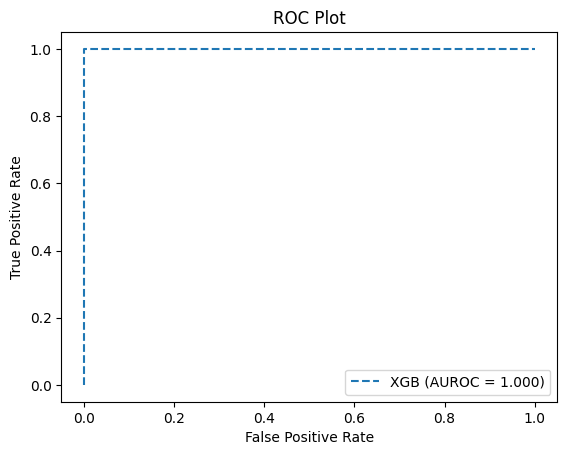

In [ ]:
# Plot the curve
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGB (AUROC = %0.3f)' % xgb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
# Show plot
plt.show();

Not sure why my curve looks like this but im definitely coming to your office hours to fix it.